In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('big_data_mart.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [9]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values present in Item_Weight and Outlet_Size.

In [17]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [18]:
df['Item_Weight'].isnull().sum()

0

In [19]:
df['Outlet_Size'].isnull().sum()

0

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])


In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [28]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [30]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
df_cor=df.corr()

In [32]:
df_cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017103,-0.017843,0.028041,0.025258,-0.007118,0.035689,-0.016294,-0.001756,-0.026358,0.006443
Item_Fat_Content,-0.017103,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.017843,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028041,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.025258,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007118,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.035689,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.016294,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,-0.001756,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.026358,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


Item_outlet_sales is highly correlate with Item_MRP and Outlet_Type.
Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.


In [33]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.234540,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.150000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


skewness is present in Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,outlet_Location_Type and Outlet_Type columns.
outliers are present in Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year and Outlet_Type.

<AxesSubplot:>

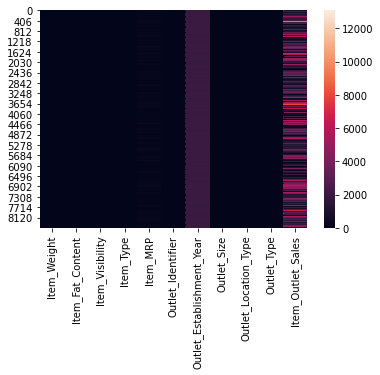

In [34]:
sns.heatmap(df)

There is no null values.

<AxesSubplot:>

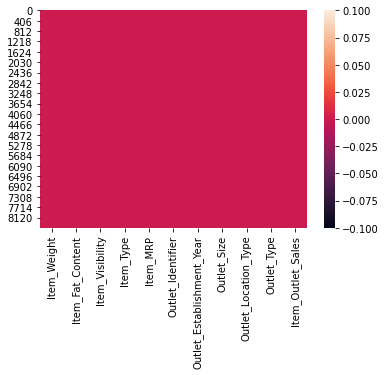

In [35]:
sns.heatmap(df.isnull())

No null values.

<AxesSubplot:>

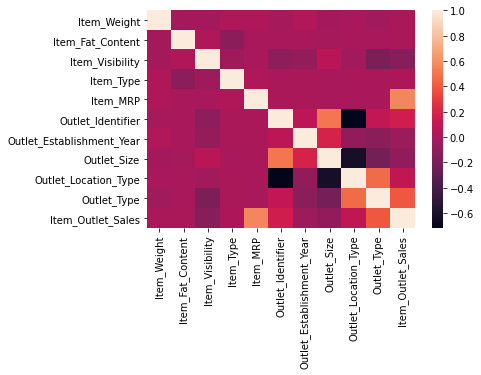

In [36]:
sns.heatmap(df_cor)

Item_Outlet_Sales column is highly correlate with Item_MRP and Outlet_Type.
Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.

<AxesSubplot:>

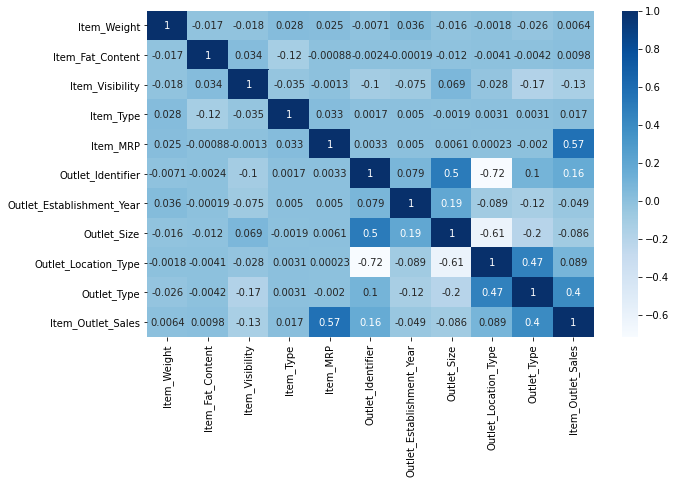

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Item_Outlet_Sales column is highly correlate with Item_MRP and Outlet_Type. Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.

<AxesSubplot:>

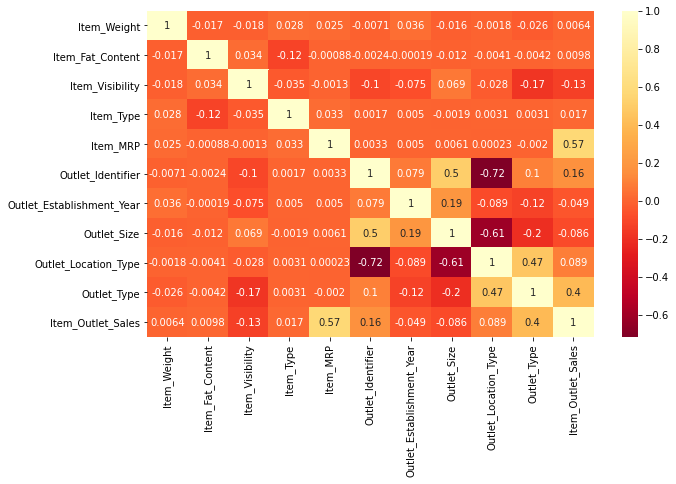

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='YlOrRd_r', annot=True)

Item_Outlet_Sales column is highly correlate with Item_MRP and Outlet_Type. Item_Outlet_Sales column is least correlate with Item_Visibility,Outlet_Establishment_Year and Outlet_Size.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

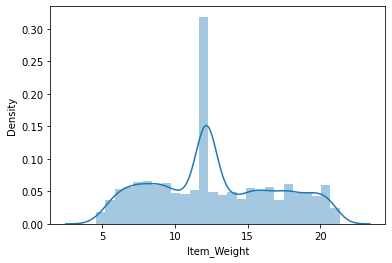

In [44]:
sns.distplot(df['Item_Weight'])

NO skewness present.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

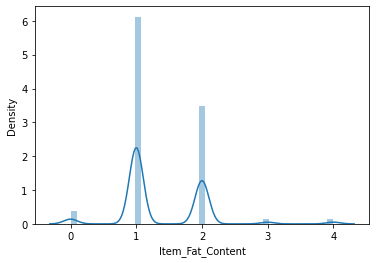

In [45]:
sns.distplot(df['Item_Fat_Content'])

Skewness Present.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

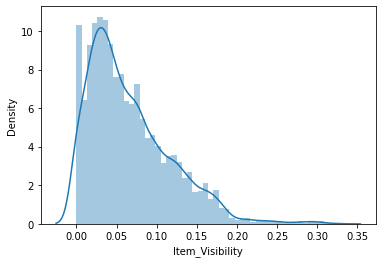

In [46]:
sns.distplot(df['Item_Visibility'])

skewness present.

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

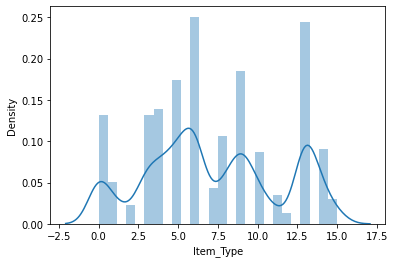

In [47]:
sns.distplot(df['Item_Type'])

No skewness present.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

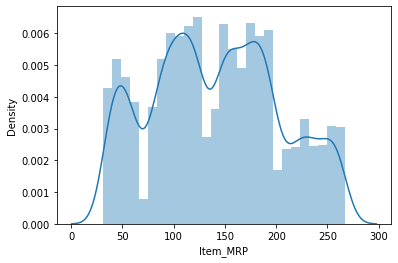

In [48]:
sns.distplot(df['Item_MRP'])

No Skewness present.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

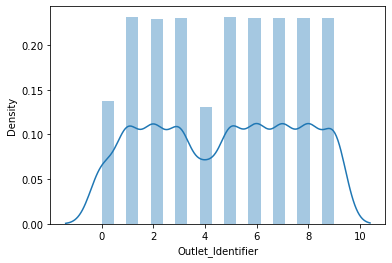

In [49]:
sns.distplot(df['Outlet_Identifier'])

No Skewness Present.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

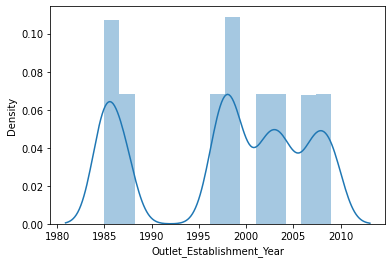

In [50]:
sns.distplot(df['Outlet_Establishment_Year'])

No Skewness Present.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

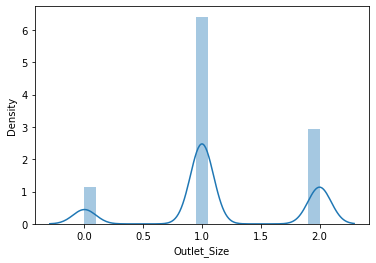

In [51]:
sns.distplot(df['Outlet_Size'])

No skewness Present.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

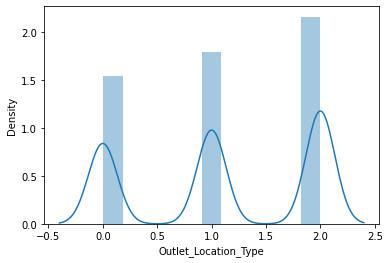

In [52]:
sns.distplot(df['Outlet_Location_Type'])

No Skewness Present.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

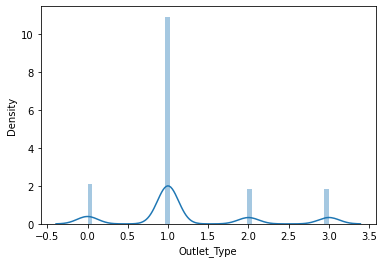

In [53]:
sns.distplot(df['Outlet_Type'])

Skewness present.

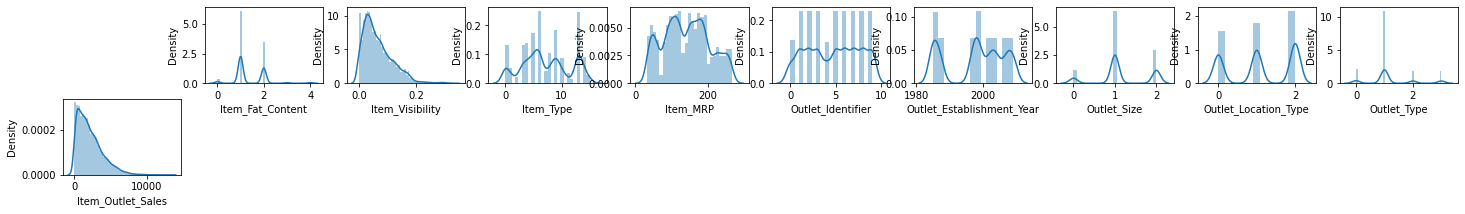

In [56]:
collist=df.columns.values
ncol=10
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

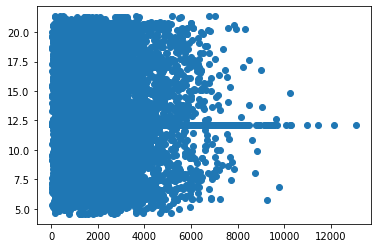

In [58]:
plt.scatter(df['Item_Outlet_Sales'],df['Item_Weight'])

In [ ]:
Item_weight is scattered in the range of between 5 to 23.

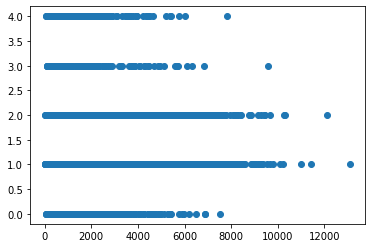

In [59]:
plt.scatter(df['Item_Outlet_Sales'],df['Item_Fat_Content'])

Item_Fat_Content is scattered mainly 0,1,2,3 and 4.

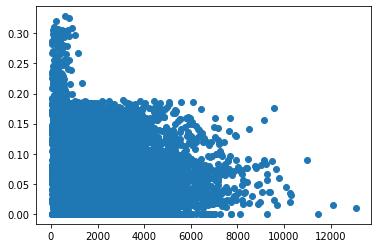

In [60]:
plt.scatter(df['Item_Outlet_Sales'],df['Item_Visibility'])

Item_Visibility is scattered between 0.00 to 0.35 range.

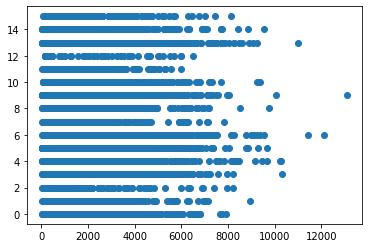

In [61]:
plt.scatter(df['Item_Outlet_Sales'],df['Item_Type'])

Item_Type is scattered between 0 to 16 range.

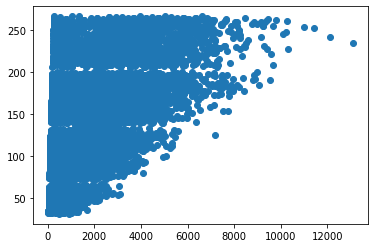

In [62]:
plt.scatter(df['Item_Outlet_Sales'],df['Item_MRP'])

Item_MRP is scattered from 0 to 300 range.

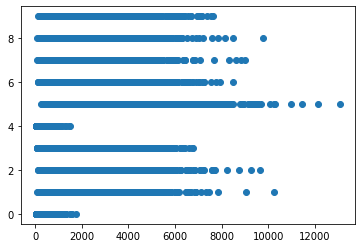

In [63]:
plt.scatter(df['Item_Outlet_Sales'],df['Outlet_Identifier'])

Outlet_Identifier is scattered in the range of 0 to 10.

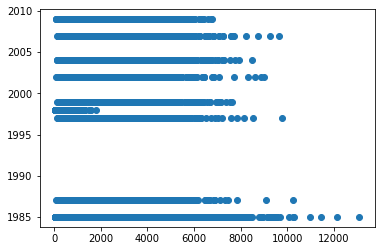

In [64]:
plt.scatter(df['Item_Outlet_Sales'],df['Outlet_Establishment_Year'])

Outlet_Establishment_Year is scatteres between year 1985 to 2008.

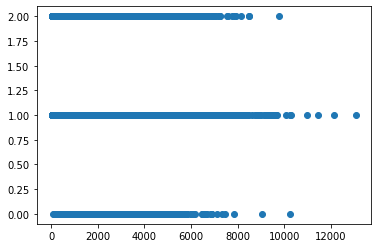

In [65]:
plt.scatter(df['Item_Outlet_Sales'],df['Outlet_Size'])

Outlet_Size is scattered into  0.00,1.00 and 2.00 range.

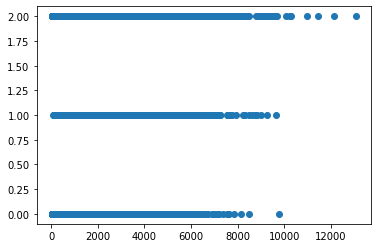

In [66]:
plt.scatter(df['Item_Outlet_Sales'],df['Outlet_Location_Type'])

Outlet_Location_Type is scattered into 0.00,1.00 and 2.00 range.

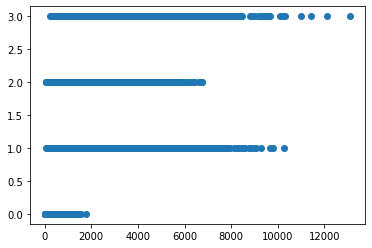

In [67]:
plt.scatter(df['Item_Outlet_Sales'],df['Outlet_Type'])

Outlet_Type is scattered 0.0,1.0,2.0 and 3.0.

In [68]:
df['Outlet_Type']

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int32

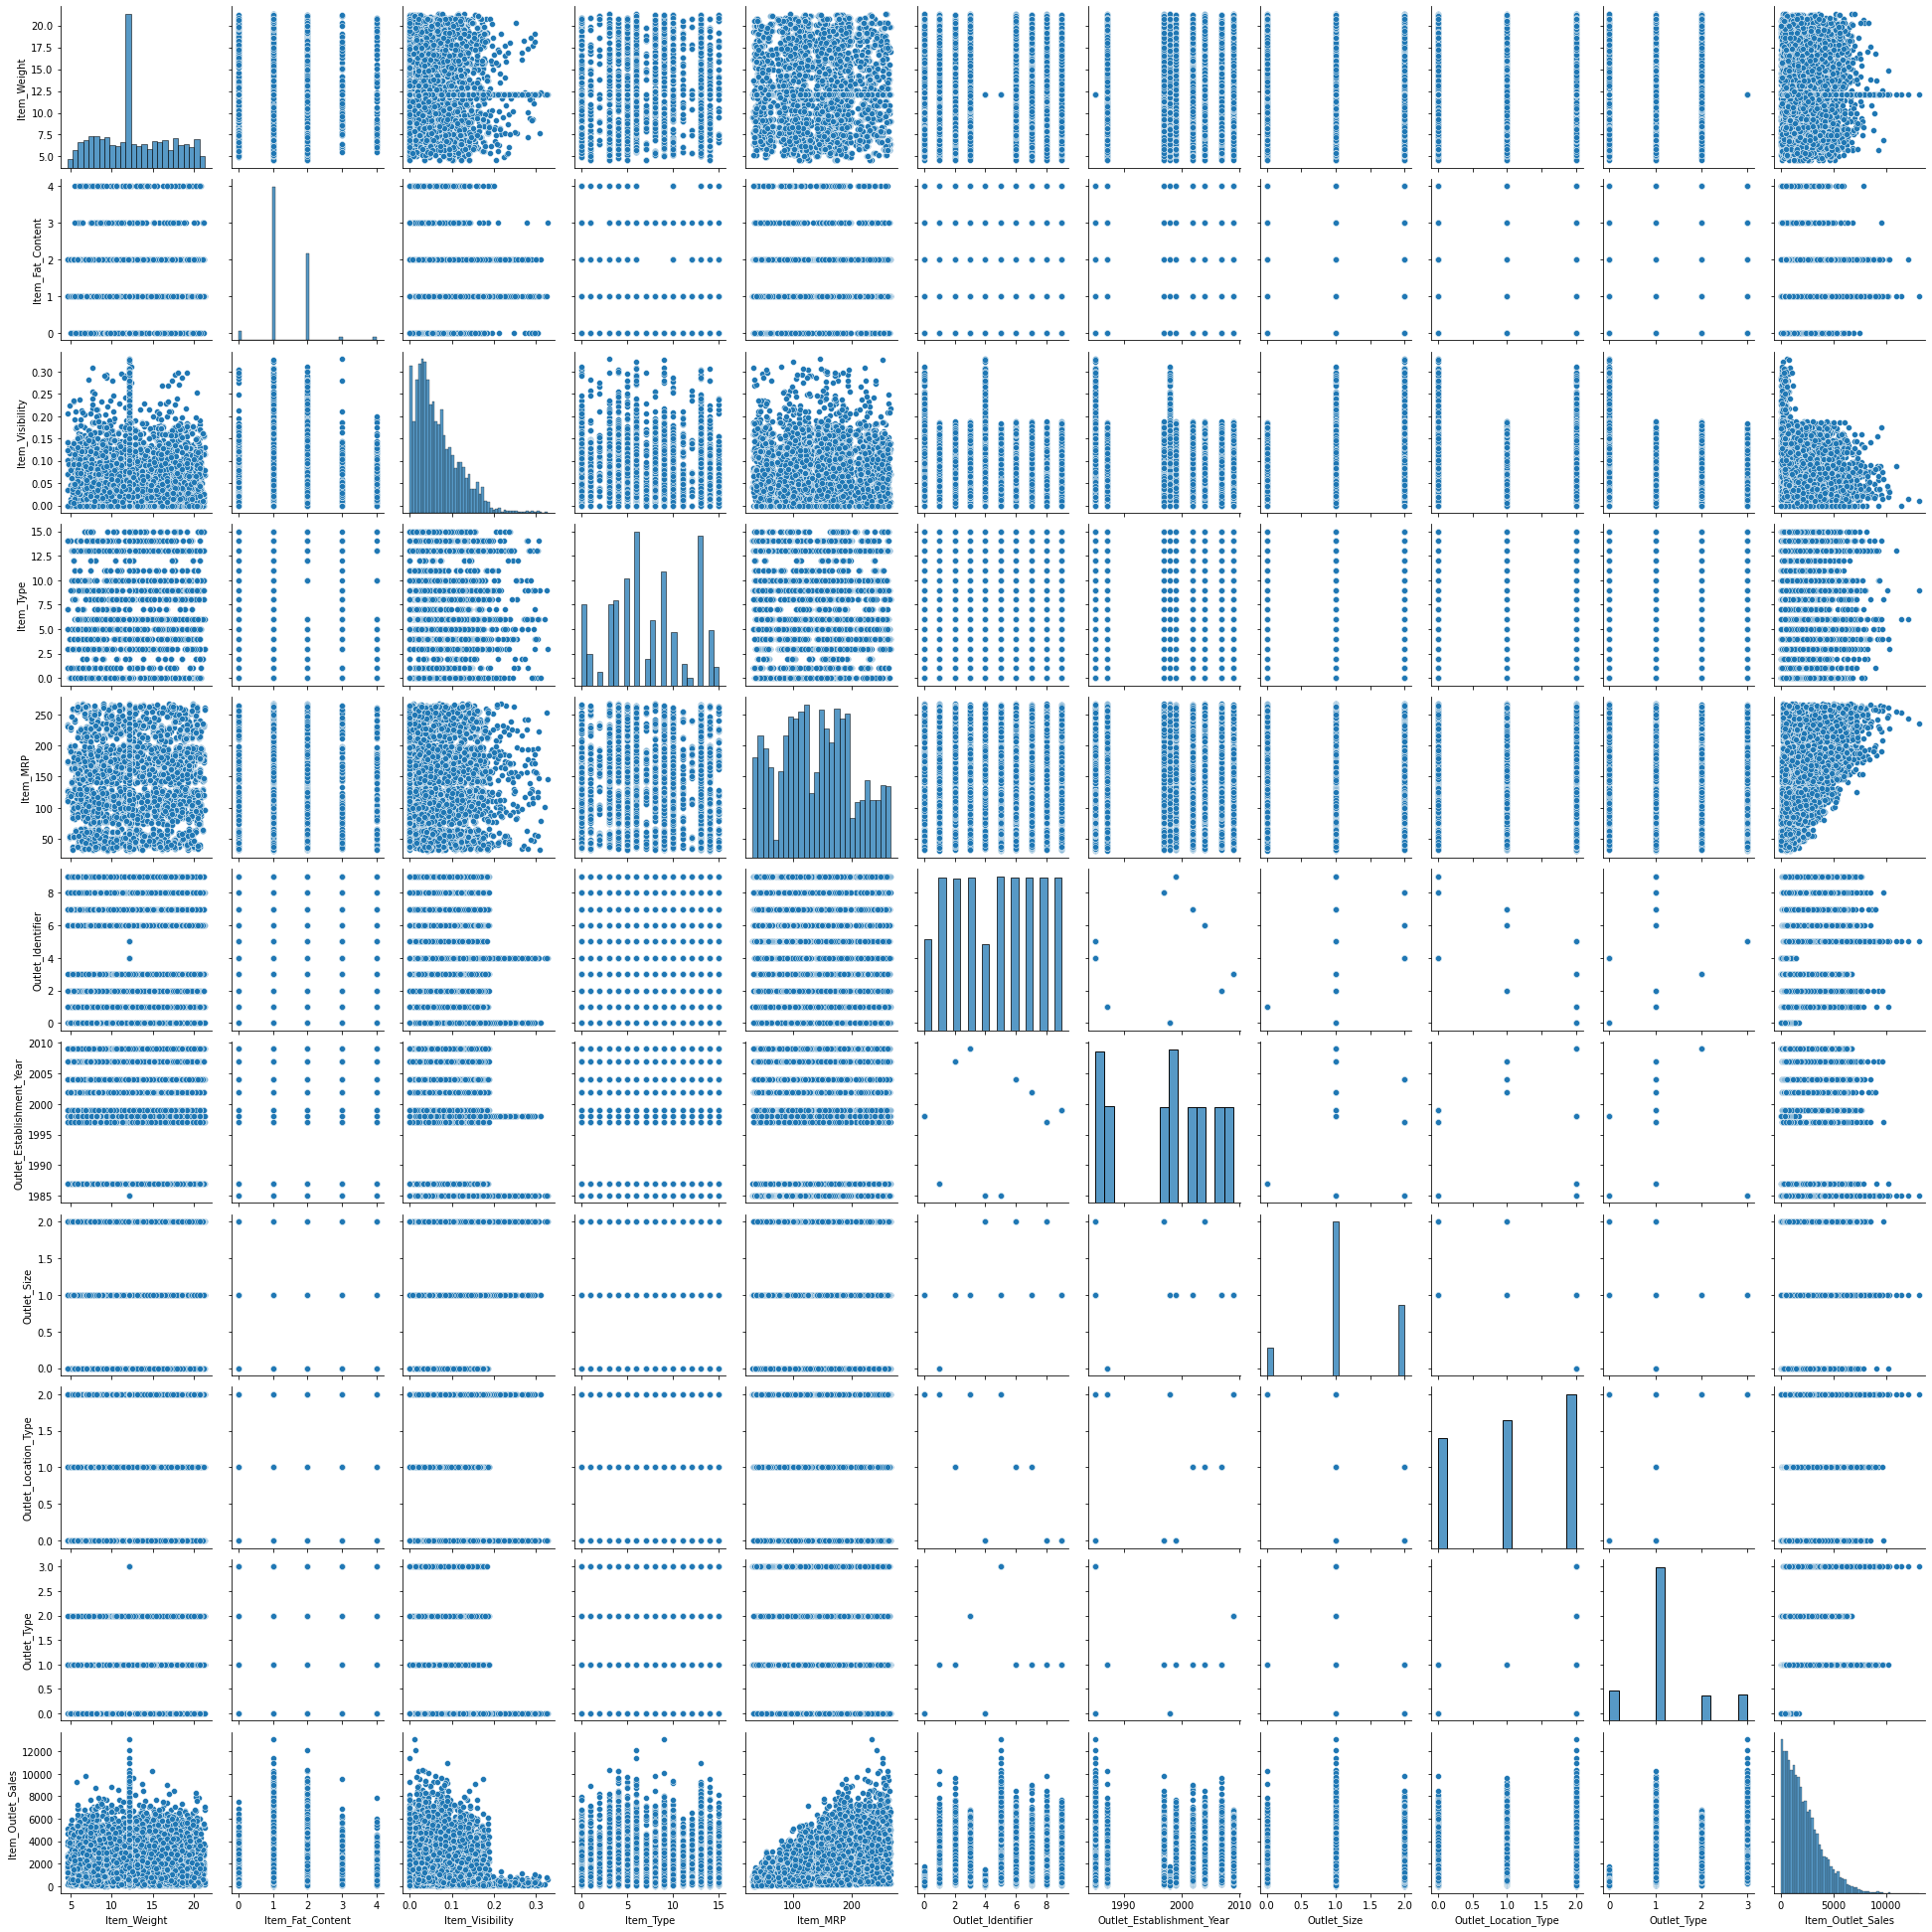

In [69]:
sns.pairplot(df)

In [70]:
df.skew()

Item_Weight                  0.175321
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Skewness is present in Item_Fat_Content,Item_Visibility and Outlet_Type.

# Removing skewness

In [71]:
df['Item_Fat_Content']=np.log1p(df['Item_Fat_Content'])

In [72]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])

In [73]:
df['Outlet_Type']=np.log1p(df['Outlet_Type'])

In [74]:
df.skew()

Item_Weight                  0.175321
Item_Fat_Content            -0.332843
Item_Visibility              1.015334
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.236040
Item_Outlet_Sales            1.177531
dtype: float64

<AxesSubplot:>

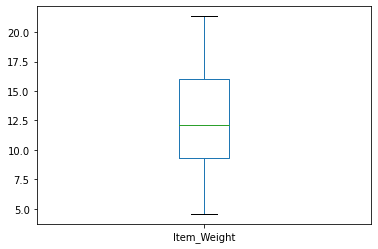

In [75]:
df['Item_Weight'].plot.box()


No Outliers are present.

<AxesSubplot:>

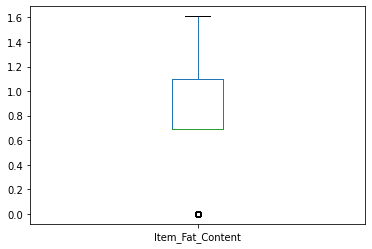

In [76]:
df['Item_Fat_Content'].plot.box()

outliers are present.

<AxesSubplot:>

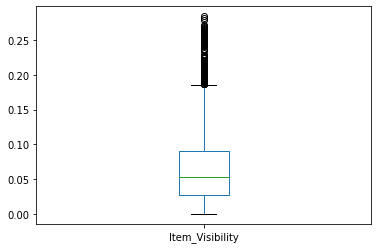

In [77]:
df['Item_Visibility'].plot.box()

Outliers are present.

<AxesSubplot:>

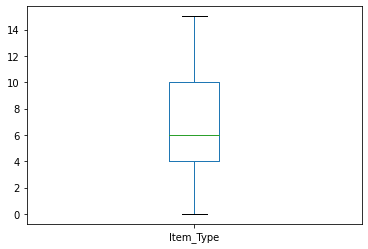

In [78]:
df['Item_Type'].plot.box()

No outliers are present.

<AxesSubplot:>

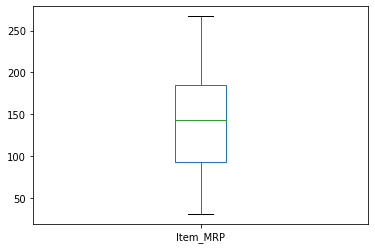

In [79]:
df['Item_MRP'].plot.box()

No Outliers are present.

<AxesSubplot:>

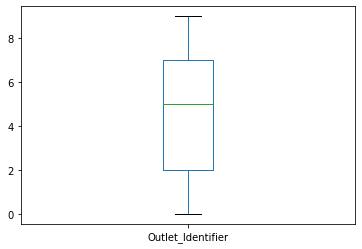

In [80]:
df['Outlet_Identifier'].plot.box()

No Outliers are present.

<AxesSubplot:>

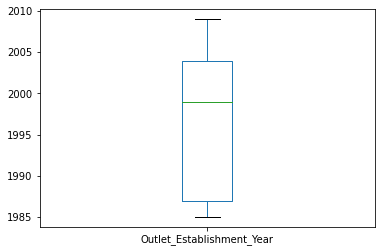

In [81]:
df['Outlet_Establishment_Year'].plot.box()

No Outliers are Present.

<AxesSubplot:>

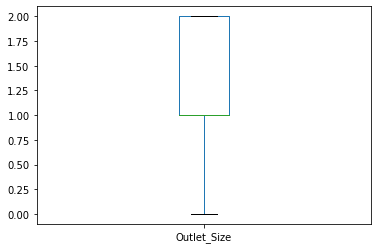

In [82]:
df['Outlet_Size'].plot.box()

No Outliers are present.

<AxesSubplot:>

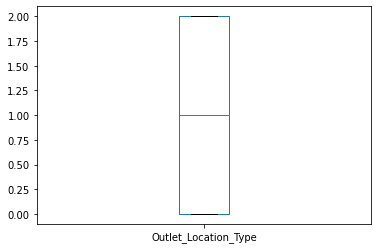

In [83]:
df['Outlet_Location_Type'].plot.box()

No Outliers are Present.

<AxesSubplot:>

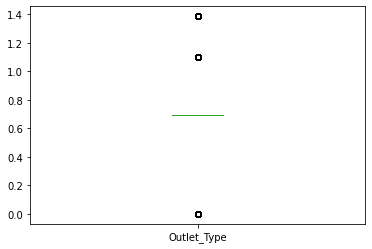

In [84]:
df['Outlet_Type'].plot.box()

Outliers are present.

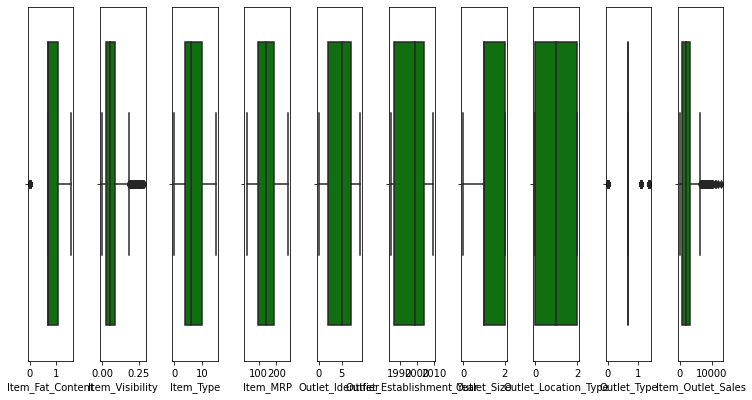

In [97]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers are present in Item_Fat_Content,Item_Visibility,Outlet_Type and Item_Outlet_Sales columns.

In [85]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

# Removing Outliers

In [86]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))



(array([  45,   49,   65,   83,  108,  121,  130,  145,  174,  175,  207,
        210,  219,  238,  276,  304,  333,  373,  389,  415,  434,  439,
        455,  456,  472,  481,  502,  504,  507,  521,  524,  532,  551,
        589,  610,  621,  661,  677,  694,  753,  805,  809,  851,  854,
        905,  935,  946,  948,  991,  997, 1003, 1009, 1021, 1051, 1086,
       1104, 1116, 1118, 1138, 1159, 1179, 1254, 1272, 1278, 1286, 1305,
       1311, 1321, 1324, 1335, 1393, 1403, 1434, 1445, 1450, 1460, 1496,
       1506, 1551, 1575, 1589, 1632, 1640, 1644, 1651, 1653, 1655, 1661,
       1680, 1690, 1693, 1780, 1802, 1805, 1827, 1827, 1828, 1841, 1841,
       1849, 1859, 1865, 1869, 1913, 1945, 1953, 1955, 1978, 1985, 1998,
       2024, 2028, 2043, 2048, 2056, 2088, 2109, 2112, 2122, 2144, 2188,
       2207, 2216, 2238, 2244, 2251, 2251, 2279, 2293, 2308, 2321, 2324,
       2326, 2347, 2403, 2439, 2456, 2516, 2534, 2535, 2586, 2601, 2613,
       2613, 2675, 2697, 2709, 2728, 2742, 2755, 2

In [87]:
z[49][2]

3.484992475119097

In [88]:
z[8467][1]

3.047279259345217

In [89]:
df_new=df[(z<3).all(axis=1)]

In [90]:
df_new.shape

(8041, 11)

In [91]:
df.shape

(8523, 11)

8523-8041=482 outliers are removed from dataframe.

In [94]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [95]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.693147,0.015920,4,249.8092,9,1999,1,0,0.693147
1,5.920,1.098612,0.019095,14,48.2692,3,2009,1,2,1.098612
2,17.500,0.693147,0.016621,10,141.6180,9,1999,1,0,0.693147
3,19.200,1.098612,0.000000,6,182.0950,0,1998,1,2,0.000000
4,8.930,0.693147,0.000000,9,53.8614,1,1987,0,2,0.693147
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.693147,0.055230,13,214.5218,1,1987,0,2,0.693147
8519,8.380,1.098612,0.045912,0,108.1570,7,2002,1,1,0.693147
8520,10.600,0.693147,0.034581,8,85.1224,6,2004,2,1,0.693147
8521,7.210,1.098612,0.135597,13,103.1332,3,2009,1,2,1.098612


In [96]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8041, dtype: float64

In [129]:
def getScore(m):
    max_score=0
    max_i=0
   
    for i in range(0,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        rscore=r2_score(y_test,pred)
        if(rscore>max_score):
            max_score=rscore
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=max_i)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("mean absolute error:",mean_absolute_error(y_test,pred))
    print("mean squared error",mean_squared_error(y_test,pred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))


In [130]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)
lr=LinearRegression()
getScore(lr)

max score 0.5416975286749057
max i 57
mean absolute error: 824.7322705824387
mean squared error 1184941.1359980644
Root Mean Squared Error: 1088.5500153865528


In [131]:
lr.coef_

array([-1.47652587e+00,  8.60710092e+01, -6.16193834e+02,  1.12098602e+00,
        1.46322936e+01,  1.30755730e+01, -6.29156245e+00, -1.61530864e+02,
       -2.62193743e+02,  2.03345598e+03])

In [132]:
lr.intercept_

11554.42448955648

# Regularization :: L1 and L2 Regularization¶

In [133]:
from sklearn.linear_model  import Lasso,Ridge
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0) #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5217622738741887

In [134]:
ls.coef_

array([   2.61979869,   81.97995639, -556.19797349,   -4.67517123,
         14.58860809,   29.47889884,   -9.7904596 , -181.54807313,
       -229.15592689, 1988.42418423])

In [135]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5217622738764958

In [136]:
rd.coef_

array([   2.61980442,   81.98229475, -556.24563191,   -4.67518152,
         14.58860836,   29.47866266,   -9.79047183, -181.54835534,
       -229.15693451, 1988.42480786])

In [137]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.5217620537374146


array([   2.61972962,   81.81051499, -542.83868096,   -4.67306186,
         14.588447  ,   29.73027912,   -9.78272846, -181.65570305,
       -228.25212373, 1986.72384174])

# Cross validation

In [138]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print(score.mean(),score.std())

[0.52968022 0.52902468 0.52394451 0.47195964 0.53182079 0.53780588
 0.51523908 0.50630768]
0.5182228116939671 0.019812389416999875


# Ensemble Techniques

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.5425047259559312
1182181.5467851271


In [124]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(r2_score(y_test,predab))
print(mean_squared_error(y_test,predab))

0.5646550778037196
1124944.3714635503


# Saving the Model

In [125]:
import joblib
joblib.dump(lr,"bigdata.obj")

['bigdata.obj']

In [127]:
file=joblib.load('bigdata.obj')

In [128]:
file.predict(x_test)

array([1194.16868276, 2670.79253416, 1491.76162727, ..., 3825.33362896,
       2631.71659951, 1440.86814749])